y1(0) = 0:  True
y2(l/2) = 0:  True
y1(L/2) = y2(0):  True
y'1(L/2) = y'2(0):  True


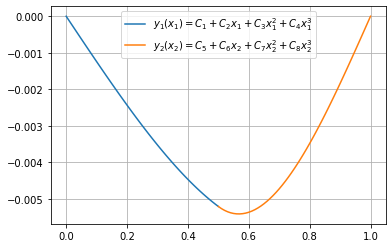

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# DECLARA SIMBOLOS
x1, x2, L, E, I1, I2, P, C1, C2, C3, C4, C5, C6, C7, C8 = sym.symbols('x1 x2 L E I1 I2 P C1 C2 C3 C4 C5 C6 C7 C8')

# POLINOMIOS DE 3º GRAU
y1 = C1 + C2*x1 + C3*x1**2 + C4*x1**3
y2 = C5 + C6*x2 + C7*x2**2 + C8*x2**3

# APLICA CONDIÇÃO DE CONTORNO y1(0) = 0 PARA OBTER C1
C1_ = sym.solve(y1.subs(x1,0), C1)[0]
y1 = y1.subs(C1,C1_)

# APLICA CONDIÇÃO DE CONTORNO y2(l/2) = 0 PARA OBTER C5
C5_ = sym.solve(y2.subs(x2,L/2),C5)[0]
y2 = y2.subs(C5,C5_)

# APLICA CONDIÇÃO DE CONTORNO y1(l/2) = y2(0) PARA OBTER C6
C6_ = sym.solve(y1.subs(x1,L/2) - y2.subs(x2,0), C6)[0]
y2 = y2.subs(C6,C6_)

# APLICA CONDIÇÃO DE CONTORNO dy1(l/2) = dy2(0) PARA OBTER C2
C2_ = sym.solve((y1.diff(x1).subs(x1,L/2) - y2.diff(x2).subs(x2,0)), C2)[0]
y1 = y1.subs(C2,C2_)
y2 = y2.subs(C2,C2_)

# SEGUNDA DERIVADA DE y1 E y2
ddy1 = y1.diff(x1,x1)
ddy2 = y2.diff(x2,x2)

# ENERGIA
en = sym.integrate((E*I1*ddy1**2)/2, (x1, 0, L/2)) + sym.integrate((E*I2*ddy2**2)/2, (x2, 0, L/2)) - P*y1.subs(x1,L/2)

# RESOLVER SISTEMA PARA ENCONTRAR C3, C4, C7 E C8
C3_, C4_, C7_, C8_ = sym.solve((en.diff(C3), en.diff(C4), en.diff(C7), en.diff(C8)), C3, C4, C7, C8).values()

# EQUAÇÃO DA LINHA ELASTICA FINAL
y1 = y1.subs([(C3,C3_), (C4,C4_), (C7,C7_), (C8,C8_)]).simplify()
y2 = y2.subs([(C3,C3_), (C4,C4_), (C7,C7_), (C8,C8_)]).simplify()

# VALIDA SE TODAS AS CONDIÇÕES DE CONTORNO FORAM SATISFEITAS
print("y1(0) = 0: ", y1.subs(x1,0).simplify() == 0)
print("y2(l/2) = 0: ", y2.subs(x2,L/2).simplify() == 0)
print("y1(L/2) = y2(0): ", y1.subs(x1,L/2).simplify() == y2.subs(x2,0).simplify())
print("y'1(L/2) = y'2(0): ", y1.diff(x1).subs(x1,L/2).simplify() == y2.diff(x2).subs(x2,0).simplify())

# PLOT
x_range = np.arange(0.0, 0.51, 0.01)
x_1 = list()
y_1 = list()
x_2 = list()
y_2 = list()

for i in x_range:
    value = y1.subs([(x1, i), (E,5), (L,1), (I1,200), (I2, 50), (P,-100)])
    x_1.append(i)
    y_1.append(value)
        
for i in x_range:
    value = y2.subs([(x2, i), (E,5), (L,1), (I1,200), (I2, 50), (P,-100)])
    x_2.append(i+0.5)
    y_2.append(value)

plt.plot(x_1, y_1)
plt.plot(x_2, y_2)
plt.legend(["$y_1(x_1) = C_{1} + C_{2} x_{1} + C_{3} x_{1}^{2} + C_{4} x_{1}^{3}$", "$y_2(x_2) = C_{5} + C_{6} x_{2} + C_{7} x_{2}^{2} + C_{8} x_{2}^{3}$"])
plt.grid()
